# GitHub link: https://github.com/carolinedesat/CA1

# CCT College Dublin
## Assessment Cover Page<br>

**Module Title:** Artificial Intelligence<br>
**Assessment Title:** AI_Lv8_CA2_v8<br>
**Lecturer Name:** David McQuaid<br>
**Student Full Name:** Caroline de Sa Teixeira<br>
**Student Number:** 2020331<br>
**Assessment Due Date:** 19/11/2023<br>
**Date of Submission:** 19/11/2023<br>

### Declaration

By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.

#### Question 1:

A puzzle has multiple ways of reaching the end solution. Fig. 1 shows a graph that represents all possible routes to the solution. The starting point of the game is represented by A, the solution is represented by S. The other points in the graph are possible intermediary stages.

###### (a) The graph in Fig. 1 is a visualisation of the problem.

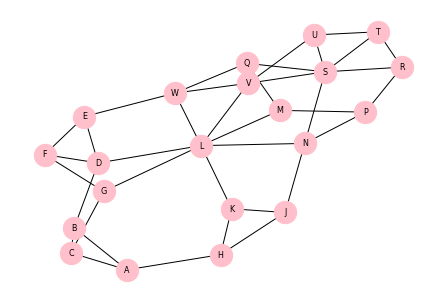

In [323]:
# Imports the network and matplotlib libraries
import networkx as nx
import matplotlib.pyplot as plt

# Defines a graph which maps the nodes, edges and weights
graph1 = {
    'A': {'B': 1, 'C': 5, 'H': 2},
    'B': {'A': 1, 'C': 2, 'D': 4},
    'C': {'A': 1, 'B': 2, 'G': 1},
    'D': {'B': 4, 'E': 4, 'F': 7, "L": 7},
    'E': {'D': 4, 'F': 3, 'W': 6},
    'F': {'D': 7, 'E': 3, 'G': 2},
    'G': {'C': 1, 'F': 2, 'L': 3},
    'H': {'A': 2, 'J': 9, 'K': 6},
    'J': {'H': 9, 'K': 3, 'N': 6},
    'K': {'H': 5, 'J': 3, 'L': 5},
    'L': {'D': 7, 'G': 3, 'K': 5, 'M': 4, 'N': 3, 'V': 10, 'W': 8},
    'M': {'L': 4, 'P': 2, 'Q': 10},
    'N': {'J': 6, 'L': 3, 'P': 4, 'S': 7},
    'P': {'M': 2, 'N': 4, 'R': 5},
    'Q': {'M': 10, 'S': 8, 'W': 4},
    'R': {'P': 5, 'S': 4, 'T': 3},
    'S': {'N': 7, 'Q': 8, 'R': 4, 'T': 4, 'U': 2, 'V': 6},
    'T': {'R': 3, 'S': 4, 'U': 1},
    'U': {'S': 2, 'T': 1, 'V': 3},
    'V': {'L': 10, 'S': 6, 'U': 3, 'W': 0},
    'W': {'E': 6, 'L': 8, 'Q': 4, 'V': 0}
}

# Creates a graph
G = nx.Graph(graph1)

# Creates the layout
pos = nx.spring_layout(G, seed=9)

# Draws the graph
nx.draw(G, pos, with_labels=True, node_size=500, node_color="pink", font_size=8, font_color='black')

# Draws tge edge labels on the graph
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

# Customizes the plot
ax = plt.gca()

# Shows the plot
plt.show()

###### (i) Identify the differences between a graph and a tree.

A graph is a type of data structure that can be considered a collection of nodes and edges. The edges are responsible for establishing connections between nodes, sometimes forming cycles and loops. Graphs can also be directed, with edges having specific directions, or undirected, which means that edges don't have a specific direction. Additionally, graphs can contain weighted edges, providing specific cost values to the edges of a graph. They can be efficiently represented through adjacency matrices or lists. Notably, a graph does not contain unique nodes or roots.

A tree is a specific type of graph, composed of nodes and edges. Unlike a general graph, it cannot form cycles or loops. Trees provide a unique path between any two nodes, with a single node called the root serving as the starting point of the tree. The root node can have multiple child nodes. Trees can be further categorized into two distinct types: binary trees, where each node has at most two children, and non-binary trees, where each node can have any number of children.

###### (ii) Explain in detail how the graph is an abstraction of the problem.

The origin of graph theory can be traced back to the Königsberg bridge problem, which illustrates how a graph is an abstraction of a problem. Königsberg used to be a city in Prussia with the Pregel River splitting it in two, which was connected by bridges. The smaller island was connected with two bridges, while the big island was connected with only one. The challenge was to discover a way to traverse all the bridges without repeating any of them, and it was also not allowed to swim.

To solve this problem, the mathematician Leonhard Euler created a graph. He used dots (nodes) to represent the landmasses and lines (edges) to represent the relationships between the nodes. This representation is what we call a graph. After analysing the problem, he discovered that, in order to successfully navigate the landmasses while crossing each bridge only once, a person must enter through one bridge and exit through another. However, he realized that two of those nodes would have an odd (and greater than two) number of lines connecting the nodes, and nodes with an odd number of connections confirm the impossibility of creating a unique path that traverses all bridges only once.


###### (iii) Identify the advantages of using a visualisation such as the one shown in Fig. 1.

Weighted graphs can offer several significant advantages, with one of them being the incorporation of costs, distances, or any other measurement units for edges. This type of graph provides a superior representation of real-world scenarios compared to an ordinary graph. It enables more precise pathfinding through the use of efficient algorithms and allows flexibility when analyzing the relationships of a node with other nodes. Weighted graphs also possess the ability to model uncertainty by representing uncertain or probabilistic relationships between nodes.

There are several implementations of weighted graphs in the real world such as: 2D matrix games, compilers, artificial intelligence, transportation networks, social networks, and many more. We can also consider Google Maps as an example of a weighted graph implementation. Your home and workplace, for instance, are be represented by two different nodes, with the path between them being a weighted edge denoting the distance that connects you to your job.

###### (b) Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage.

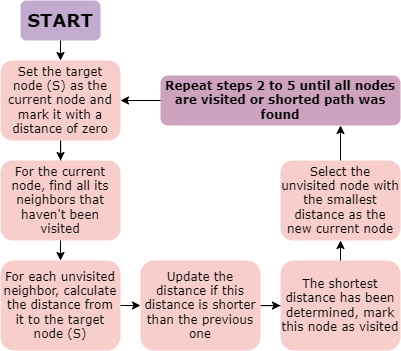

#### Question 2:

The creator of the puzzle has been told that the A* algorithm is more efficient at finding the shortest path because it uses heuristics. Compare the performance of Dijkstra’s algorithm and the A* search algorithm, referring to heuristics, to find the shortest path to the problem by implementing both algorithms programmatically and comparing the solutions generated in Mark-down. Refer to the complexity of the algorithms and compare the actual time it takes for the solutions to be processed.

### Dijkstra’s Algorithm

In [324]:
# Imports the heapq library
import heapq

# Calculates the distance from the starting node to all other nodes
def calculate_distancesh(graph1, starting_node):
    # Creates a dictionary to store the distance
    distances = {vertex: float('infinity') for vertex in graph1}
    # Sets the distance from the starting node to zero
    distances[starting_node] = 0

    # Creates a queue with the zero value and the starting node
    pq = [(0, starting_node)]

    # Loops until the queue is empty
    while len(pq) > 0:
        # Gets the node with the minimum distance from the queue
        current_distance, current_node = heapq.heappop(pq)

        # Checks if current distance > recorded distance for the current node. If yes, skip
        if current_distance > distances[current_node]:
            continue

        # Iterates through neighbor nodes and calculates the distance between them
        for neighbor, weight in graph[current_node].items():
            distance = current_distance + weight

            # Considers if the new path is better than previous found paths
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                
                # Adds the neighbor and new distance queue
                heapq.heappush(pq, (distance, neighbor))

    # Return the "distances" value
    return distances

# Finds and prints the resulting path
dijkstra_path = search(maze, cost, start, end)
print("Shortest Path:\n")
print('\n'.join([''.join(["{:" ">3d}".format(item) for item in row]) for row in path]))

Shortest Path:

  0 -1 -1 -1 -1 -1
  1  2  3  4  5 -1
 -1 -1 -1 -1  6  7
 -1 -1 -1 -1 -1  8
 -1 -1 -1 -1 -1  9


### Time for Dijkstra's Algorithm

In [325]:
# Imports the time library
import time

# Measures time for Dijkstra's Algorithm
dijkstra_start_time = time.time()
dijkstra_execution_time = time.time() - dijkstra_start_time

print("Execution Time:", dijkstra_execution_time, "seconds")

Execution Time: 0.0 seconds


### A* Algorithm

In [326]:
# Defines the heuristics
graph3 = {
    'A': 17,
    'B': 16,
    'C': 14,
    'D': 18,
    'E': 17,
    'F': 15,
    'G': 13,
    'H': 22,
    'J': 13,
    'K': 15,
    'L': 10,
    'M': 11,
    'N': 7,
    'P': 8,
    'Q': 8,
    'R': 4,
    'S': 0,
    'T': 4,
    'U': 2,
    'V': 6,
    'W': 11
}

In [327]:
# Imports the numpy library
import numpy as np

# Defines a class
class Node:

    # Constructor
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        # Cost values
        self.g = 0
        self.h = 0
        self.f = 0

    # Method
    def __eq__(self, other):
        return self.position == other.position

# Returns the path from the start node to the current node in the maze
def return_path(current_node, maze):
    path = []
    no_rows, no_columns = np.shape(maze)
    result = [[-1 for i in range(no_columns)] for j in range(no_rows)]
    current = current_node

    # Traverse the path from the current node to the start node
    while current is not None:
        path.append(current.position)
        current = current.parent

    path = path[::-1]  # Reverse the path
    start_value = 0

    # Assigns sequential values to the cells in the result matrix along the path
    for i in range(len(path)):
        result[path[i][0]][path[i][1]] = start_value
        start_value += 1

    return result

# Performs the A* search on a maze
def search(maze, cost, start, end):

    # Creates start and end nodes
    start_node = Node(None, tuple(start))
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, tuple(end))
    end_node.g = end_node.h = end_node.f = 0

    yet_to_visit_list = []
    visited_list = []

    yet_to_visit_list.append(start_node)

    outer_iterations = 0
    max_iterations = (len(maze) // 2) ** 10

    # Creates possible moves (left, up, right, down)
    move = [[-1, 0], [0, -1], [1, 0], [0, 1]]

    no_rows, no_columns = np.shape(maze)

    # Search loop
    while len(yet_to_visit_list) > 0:

        outer_iterations += 1

        # Selects the node with the lowest total cost from the yet_to_visit_list
        current_node = yet_to_visit_list[0]
        current_index = 0
        for index, item in enumerate(yet_to_visit_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Gives up on pathfinding if the maximum number of iterations is reached
        if outer_iterations > max_iterations:
            print("Giving up on pathfinding, too many iterations")
            return return_path(current_node, maze)

        # Removes the current node from the yet_to_visit_list and add it to the visited_list
        yet_to_visit_list.pop(current_index)
        visited_list.append(current_node)

        # Returns the path if the current node is the goal node
        if current_node == end_node:
            return return_path(current_node, maze)

        # Generates children nodes by exploring possible moves
        children = []
        for new_position in move:

            node_position = (current_node.position[0] + new_position[0],
                             current_node.position[1] + new_position[1])

            # Checks if the new position is within the bounds of the maze
            if (node_position[0] > (no_rows - 1) or
                node_position[0] < 0 or
                node_position[1] > (no_columns - 1) or
                node_position[1] < 0):
                continue

            # Checks if the new position is a valid cell in the maze
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Creates a new node for the valid position
            new_node = Node(current_node, node_position)
            children.append(new_node)

        # Processes each child node
        for child in children:

            # Skips if the child node is already visited
            if len([visited_child for visited_child in visited_list if visited_child == child]) > 0:
                continue

            # Updates the cost and heuristic values for the child node
            child.g = current_node.g + cost
            child.h = (((child.position[0] - end_node.position[0]) ** 2) +
                       ((child.position[1] - end_node.position[1]) ** 2))

            child.f = child.g + child.h

            # Skips if there is a better path to the child node in the yet_to_visit_list
            if len([i for i in yet_to_visit_list if child == i and child.g > i.g]) > 0:
                continue

            # Adds the child node to the yet_to_visit_list
            yet_to_visit_list.append(child)

# Tests the algorithm using the main block
if __name__ == '__main__':

    # Example maze
    maze = [[0, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0],
            [0, 1, 0, 1, 0, 0],
            [0, 1, 0, 0, 1, 0],
            [0, 0, 0, 0, 1, 0]]

    start = [0, 0]
    end = [4, 5]
    cost = 1

    # Performs the algorithm and prints the resulting path    
    path = search(maze, cost, start, end)
    print("Shortest Path:\n")
    print('\n'.join([''.join(["{:" ">3d}".format(item) for item in row]) for row in path]))

Shortest Path:

  0 -1 -1 -1 -1 -1
  1  2  3  4  5 -1
 -1 -1 -1 -1  6  7
 -1 -1 -1 -1 -1  8
 -1 -1 -1 -1 -1  9


### Time for A* Algorithm

In [328]:
# Measures time for A* algorithm
astar_start_time = time.time()
astar_path = search(maze, cost, start, end)
astar_execution_time = time.time() - astar_start_time

print("Execution Time:", astar_execution_time, "seconds")

Execution Time: 0.0 seconds


### The shortest distance from A to S is:

In [329]:
# Calculates and prints the shortest path from 'A' to 'S'
print(f"\n{calculate_distances(graph2, 'A')['S']}.")


17.


In conclusion, the choice between Dijkstra's algorithm and A* algorithm depends on the specifics of the problem, the availability of heuristic information, and whether you prioritize an optimal or efficient search algorithm. Dijkstra's has the advantage of finding the shortest path without requiring heuristic calculations. On the other hand, A* performs well when additional information (heuristics) is available, allowing it to prioritize efficient paths.

#### Referencing

1. Caroline, S. (2022). CA3 - Advanced Numerical Methods. Advanced Numerical Methods. CCT College Dublin.. John O’Sullivan.

2. Admin (2022) Difference between graph and tree, BYJUS. BYJU’S. Available at: https://byjus.com/gate/difference-between-graph-and-tree/#:~:text=A%20graph%20is%20a%20set,set%20of%20nodes%20and%20edges.&text=In%20the%20graph%2C%20there%20is,which%20is%20known%20as%20root (Accessed: 6 November 2023).

3. Difference between graph and tree (2023) GeeksforGeeks. GeeksforGeeks. Available at: https://www.geeksforgeeks.org/difference-between-graph-and-tree/ (Accessed: 6 November 2023).

4. Graph theory and its uses with 5 examples of real life problems (no date) Xomnia. Available at: https://www.xomnia.com/post/graph-theory-and-its-uses-with-examples-of-real-life-problems/ (Accessed: 7 November 2023).

5. What is Weighted Graph with Applications, Advantages and Disadvantages (2023) GeeksforGeeks. GeeksforGeeks. Available at: https://www.geeksforgeeks.org/applications-advantages-and-disadvantages-of-weighted-graph/ (Accessed: 7 November 2023).

6. Lippman, D. (no date) Mathematics for the Liberal Arts, Lumen. Available at: https://courses.lumenlearning.com/waymakermath4libarts/chapter/shortest-path/ (Accessed: 8 November 2023).

#### Class material referencing:

7. Adapted from McQuaid, D. (2023). Dijkstra’s algorithm. Accessed: 10 November 2023

8. Adapted from McQuaid, D. (2023). A star. Accessed: 10 November 2023